<a href="https://colab.research.google.com/github/yumehara/hackday_2022/blob/main/notebooks/school_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学校情報

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q japanize-matplotlib

import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [3]:
DIR_NAME = '/content/drive/MyDrive/hackday/'

In [4]:
df_schools = pd.read_csv(os.path.join(DIR_NAME, 'schools.csv'))
print(df_schools.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2287411, 18)


### 学校数(中学校, 小学校, 幼稚園, 高等学校)

In [5]:
df_schools_count = df_schools[
    (df_schools['項目'] != '特別支援学校')
    &(df_schools['表章項目'] == '学校数')
    &((df_schools['cat01'] == '設置者別:計(国公私)') | (df_schools['cat04'] == '設置者別:計(国公私)'))
    &(df_schools['cat03'].str.contains('計'))
]

### 生徒数(中学校, 小学校, 幼稚園, 高等学校)

In [6]:
df_student_count = df_schools[
    ((df_schools['表章項目'] == '児童数') | (df_schools['表章項目'] == '生徒数') | (df_schools['表章項目'] == '在園者数・入園者数'))
    &(df_schools['cat01'] == '設置者別:計(国公私)')
    &((df_schools['cat02'] == '全日制・定時制:計（全日制＋定時制）') | (df_schools['cat02'].isna()))
    &(df_schools['cat03'] == '性別:計')
    &((df_schools['cat04'].str.contains('学年別:計')) | (df_schools['cat04'] == '在園者・入園者区分:計'))
].copy()
df_student_count['表章項目'] = '生徒数'

### 教員数(中学校, 小学校, 幼稚園, 高等学校)

In [7]:
df_teacher_count = df_schools[
    (df_schools['表章項目']=='教員数')
    &(df_schools['cat01'] == '設置者別:計(国公私)')
    &((df_schools['cat02'] == '全日制・定時制:計（全日制＋定時制）') | (df_schools['cat02'].isna()))
    &(df_schools['cat03'] == '性別:計')
    &(df_schools['cat04'] == '教員職名別:計')
    # tab_code: 190=職名別教員数(本務), 200=職名別教員数(兼務)
]

### 学級数(中学校, 小学校, 幼稚園)

In [8]:
df_class_count = df_schools[
    (df_schools['表章項目']=='学級数')
    &((df_schools['cat01'] == '設置者別:計(国公私)') | (df_schools['cat01'].isna()))
    &((df_schools['cat03'] == '学級編制方式別:計') | (df_schools['cat03'] == '設置者別:計(国公私)'))
]

### 職員数(中学校, 小学校, 幼稚園, 高等学校)

In [9]:
df_school_stuff_count = df_schools[
    (df_schools['表章項目']=='職員数')
    &(df_schools['cat01'] == '設置者別:計(国公私)')
    &((df_schools['cat02'] == '全日制・定時制:計（全日制＋定時制）') | (df_schools['cat02'].isna()))
    &(df_schools['cat03'] == '性別:計')
]

### 全て集約

In [10]:
df_school_all = pd.concat([
    df_schools_count,
    df_student_count,
    df_teacher_count,
    df_class_count,
    df_school_stuff_count
])

In [11]:
df_school_agg = pd.pivot_table(
    df_school_all, 
    index=['市町村別', 'area_code'],
    columns=['項目', '表章項目'], values='value', aggfunc='sum'
)
df_school_agg.columns = ['_'.join(col) for col in df_school_agg.columns]
df_school_agg = df_school_agg.reset_index().rename(columns={'市町村別': '市区町村名', 'area_code': '団体コード'})
df_school_agg = df_school_agg[
    (~df_school_agg['市区町村名'].str.endswith('計')) & (~df_school_agg['市区町村名'].str.endswith('大阪市外'))
].sort_values('団体コード').reset_index(drop=True)

In [12]:
print(df_school_agg.shape)
df_school_agg.head()

(1897, 21)


,市区町村名,団体コード,中学校_学校数,中学校_学級数,中学校_教員数,中学校_生徒数,中学校_職員数,小学校_学校数,小学校_学級数,小学校_教員数,...,小学校_職員数,幼稚園_学校数,幼稚園_学級数,幼稚園_教員数,幼稚園_生徒数,幼稚園_職員数,高等学校_学校数,高等学校_教員数,高等学校_生徒数,高等学校_職員数
0,中央区,1101,11.0,137.0,314.0,4303.0,44.0,17.0,307.0,475.0,...,81.0,16.0,76.0,160.0,1908.0,29.0,8.0,607.0,6575.0,85.0
1,北区,1102,16.0,253.0,557.0,7979.0,60.0,31.0,508.0,808.0,...,110.0,22.0,164.0,313.0,4047.0,71.0,10.0,788.0,8978.0,119.0
2,東区,1103,15.0,214.0,477.0,6584.0,45.0,28.0,438.0,710.0,...,94.0,15.0,131.0,252.0,3449.0,63.0,7.0,561.0,7028.0,59.0
3,白石区,1104,8.0,139.0,280.0,4458.0,41.0,20.0,327.0,521.0,...,78.0,12.0,96.0,207.0,2554.0,43.0,3.0,194.0,2510.0,23.0
4,豊平区,1105,11.0,153.0,314.0,4594.0,39.0,22.0,346.0,547.0,...,79.0,16.0,131.0,252.0,3659.0,64.0,6.0,440.0,5824.0,49.0


### 行政区単位で集約

In [13]:
df_add_cirty = pd.DataFrame([
    {'市区町村名': '札幌市', '団体コード': 1100},
    {'市区町村名': '仙台市', '団体コード': 4100},
    {'市区町村名': 'さいたま市', '団体コード': 11100},
    {'市区町村名': '千葉市', '団体コード': 12100},
    {'市区町村名': '横浜市', '団体コード': 14100},
    {'市区町村名': '川崎市', '団体コード': 14130},
    {'市区町村名': '相模原市', '団体コード': 14150},
    {'市区町村名': '新潟市', '団体コード': 15100},
    {'市区町村名': '静岡市', '団体コード': 22100},
    {'市区町村名': '浜松市', '団体コード': 22130},
    {'市区町村名': '名古屋市', '団体コード': 23100},
    {'市区町村名': '京都市', '団体コード': 26100},
    {'市区町村名': '大阪市', '団体コード': 27100},
    {'市区町村名': '堺市', '団体コード': 27140},
    {'市区町村名': '神戸市', '団体コード': 28100},
    {'市区町村名': '岡山市', '団体コード': 33100},
    {'市区町村名': '広島市', '団体コード': 34100},
    {'市区町村名': '北九州市', '団体コード': 40100},
    {'市区町村名': '福岡市', '団体コード': 40130},
    {'市区町村名': '熊本市', '団体コード': 43100},
])

In [14]:
df_school_agg['親_団体コード'] = df_school_agg['団体コード']
for index, row in df_add_cirty.iterrows():
    city_code = row['団体コード']
    high_limit = 20 if row['市区町村名'] != '大阪市' else 30
    df_school_agg.loc[(df_school_agg['団体コード'] > city_code)&(df_school_agg['団体コード'] < city_code+high_limit), '親_団体コード'] = city_code

In [15]:
for index, row in df_add_cirty.iterrows():
    print(row['市区町村名'], row['団体コード'], list(df_school_agg[df_school_agg['親_団体コード'] == row['団体コード']]['市区町村名']))

札幌市 1100 ['中央区', '北区', '東区', '白石区', '豊平区', '南区', '西区', '厚別区', '手稲区', '清田区']
仙台市 4100 ['青葉区', '宮城野区', '若林区', '太白区', '泉区']
さいたま市 11100 ['西区', '北区', '大宮区', '見沼区', '中央区', '桜区', '浦和区', '南区', '緑区', '岩槻区']
千葉市 12100 ['中央区', '花見川区', '稲毛区', '若葉区', '緑区', '美浜区']
横浜市 14100 ['鶴見区', '神奈川区', '西区', '中区', '南区', '保土ケ谷区', '磯子区', '金沢区', '港北区', '戸塚区', '港南区', '旭区', '緑区', '瀬谷区', '栄区', '泉区', '青葉区', '都筑区']
川崎市 14130 ['川崎区', '幸区', '中原区', '高津区', '多摩区', '宮前区', '麻生区']
相模原市 14150 ['緑区', '中央区', '南区']
新潟市 15100 ['北区', '東区', '中央区', '江南区', '秋葉区', '南区', '西区', '西蒲区']
静岡市 22100 ['葵区', '駿河区', '清水区']
浜松市 22130 ['中区', '東区', '西区', '南区', '北区', '浜北区', '天竜区']
名古屋市 23100 ['千種区', '東区', '北区', '西区', '中村区', '中区', '昭和区', '瑞穂区', '熱田区', '中川区', '港区', '南区', '守山区', '緑区', '名東区', '天白区']
京都市 26100 ['北区', '上京区', '左京区', '中京区', '東山区', '下京区', '南区', '右京区', '伏見区', '山科区', '西京区']
大阪市 27100 ['都島区', '福島区', '此花区', '西区', '港区', '大正区', '天王寺区', '浪速区', '西淀川区', '東淀川区', '東成区', '生野区', '旭区', '城東区', '阿倍野区', '住吉区', '東住吉区', '西成区', '淀川区', '鶴見区', '住之江区', '平野区', '北区',

In [16]:
for index, row in df_add_cirty.iterrows():
    city_code = row['団体コード']
    add_row = df_school_agg[df_school_agg['親_団体コード'] == city_code].sum()
    add_row['市区町村名'] = row['市区町村名']
    add_row['団体コード'] = city_code
    add_row['親_団体コード'] = city_code
    df_school_agg = df_school_agg.append(add_row, ignore_index=True)

In [17]:
df_school_agg = df_school_agg.sort_values('団体コード').reset_index(drop=True)
print(df_school_agg.shape)
df_school_agg.head()

(1917, 22)


,市区町村名,団体コード,中学校_学校数,中学校_学級数,中学校_教員数,中学校_生徒数,中学校_職員数,小学校_学校数,小学校_学級数,小学校_教員数,...,幼稚園_学校数,幼稚園_学級数,幼稚園_教員数,幼稚園_生徒数,幼稚園_職員数,高等学校_学校数,高等学校_教員数,高等学校_生徒数,高等学校_職員数,親_団体コード
0,札幌市,1100,107.0,1536.0,3260.0,47902.0,419.0,206.0,3255.0,5208.0,...,149.0,1012.0,1989.0,26155.0,473.0,55.0,3864.0,47283.0,505.0,1100
1,中央区,1101,11.0,137.0,314.0,4303.0,44.0,17.0,307.0,475.0,...,16.0,76.0,160.0,1908.0,29.0,8.0,607.0,6575.0,85.0,1100
2,北区,1102,16.0,253.0,557.0,7979.0,60.0,31.0,508.0,808.0,...,22.0,164.0,313.0,4047.0,71.0,10.0,788.0,8978.0,119.0,1100
3,東区,1103,15.0,214.0,477.0,6584.0,45.0,28.0,438.0,710.0,...,15.0,131.0,252.0,3449.0,63.0,7.0,561.0,7028.0,59.0,1100
4,白石区,1104,8.0,139.0,280.0,4458.0,41.0,20.0,327.0,521.0,...,12.0,96.0,207.0,2554.0,43.0,3.0,194.0,2510.0,23.0,1100


In [18]:
df_school_agg.to_csv(os.path.join(DIR_NAME, 'school_agg.csv'), index=False)

## 東京都(区・市)と、さいたま市、横浜市、名古屋市、大阪市、福岡市を比較

In [19]:
df_schools_tokyo = df_school_agg[
    ((df_school_agg['団体コード'].astype(str).str[:-3] == '13')&   # 東京都
    ((df_school_agg['市区町村名'].str.endswith('区')) | (df_school_agg['市区町村名'].str.endswith('市'))))|
    (df_school_agg['団体コード'] == 11100) |    # さいたま市
    (df_school_agg['団体コード'] == 14100) |    # 横浜市
    (df_school_agg['団体コード'] == 23100) |    # 名古屋市
    (df_school_agg['団体コード'] == 27100) |    # 大阪市
    (df_school_agg['団体コード'] == 40130)      # 福岡市
].copy()

In [20]:
df_schools_tokyo['高等学校_学級数'] = None

In [21]:
for school in ['中学校', '小学校', '幼稚園', '高等学校']:
    df_schools_tokyo[f'{school}_学校当たりの生徒数'] = df_schools_tokyo[f'{school}_生徒数'] / df_schools_tokyo[f'{school}_学校数']
    df_schools_tokyo[f'{school}_学校当たりの教員数'] = df_schools_tokyo[f'{school}_教員数'] / df_schools_tokyo[f'{school}_学校数']
    df_schools_tokyo[f'{school}_学校当たりの職員数'] = df_schools_tokyo[f'{school}_職員数'] / df_schools_tokyo[f'{school}_学校数']
    df_schools_tokyo[f'{school}_学級当たりの生徒数'] = df_schools_tokyo[f'{school}_生徒数'] / df_schools_tokyo[f'{school}_学級数']
    df_schools_tokyo[f'{school}_学級当たりの教員数'] = df_schools_tokyo[f'{school}_教員数'] / df_schools_tokyo[f'{school}_学級数']
    df_schools_tokyo[f'{school}_教員一人当たりの生徒数'] = df_schools_tokyo[f'{school}_生徒数'] / df_schools_tokyo[f'{school}_教員数']
    df_schools_tokyo[f'{school}_職員一人当たりの生徒数'] = df_schools_tokyo[f'{school}_生徒数'] / df_schools_tokyo[f'{school}_職員数']

In [22]:
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["font.size"] = 14

In [23]:
def draw_bar_graph_by_city(df_data, col_name, x_col='市区町村名'):
    data = df_data.sort_values(col_name, ascending=False)[[x_col, col_name]]
    data.plot(x=x_col, kind='bar', title=col_name, figsize=(17, 5))
    mean = data[col_name].mean()
    plt.axhline(y=mean, xmin=0, xmax=1, color='red')
    plt.grid()
    plt.legend().remove()
    plt.show()

def draw_stacked_bar_graph_by_city(df_data, title, mean):
    df_data.plot(x='市区町村名', kind='bar', stacked=True, title=title, figsize=(17, 5))
    plt.axhline(y=mean, xmin=0, xmax=1, color='red')
    plt.grid()
    plt.show()

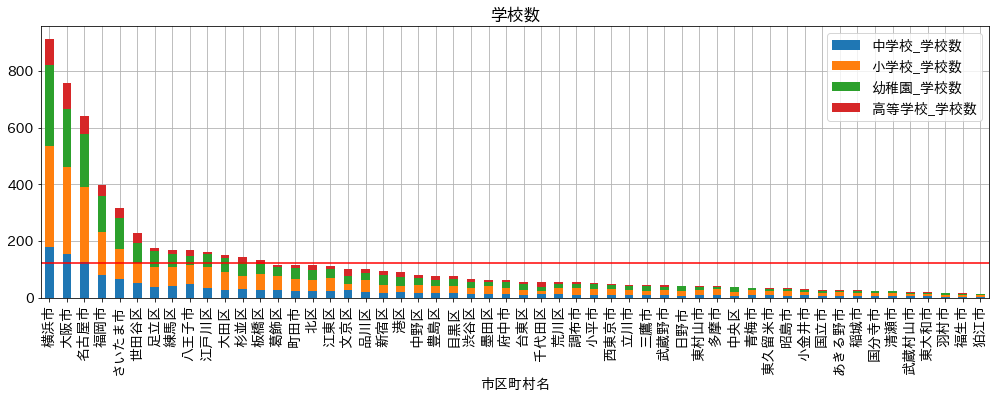

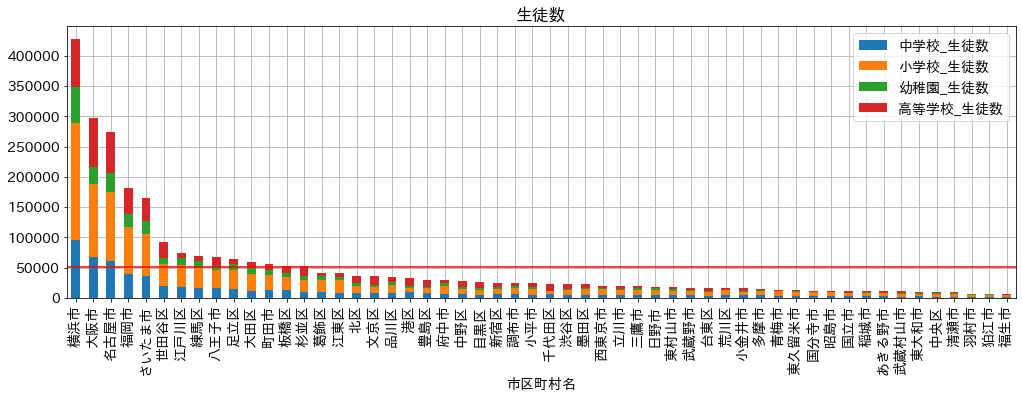

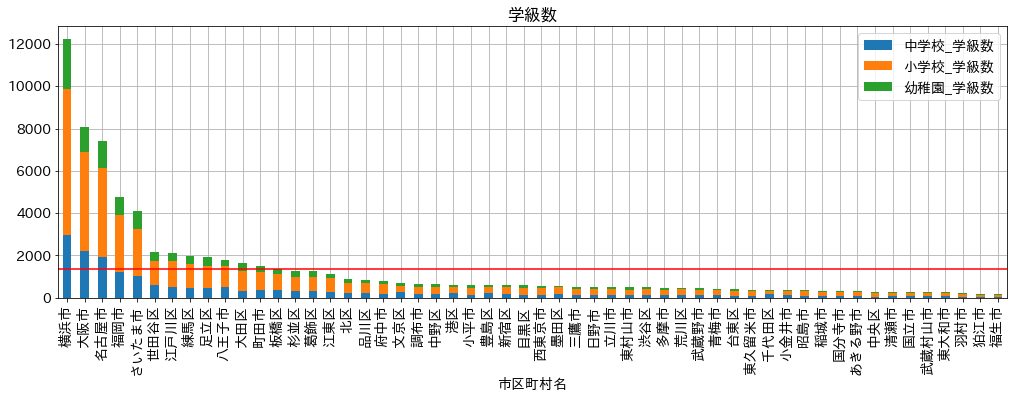

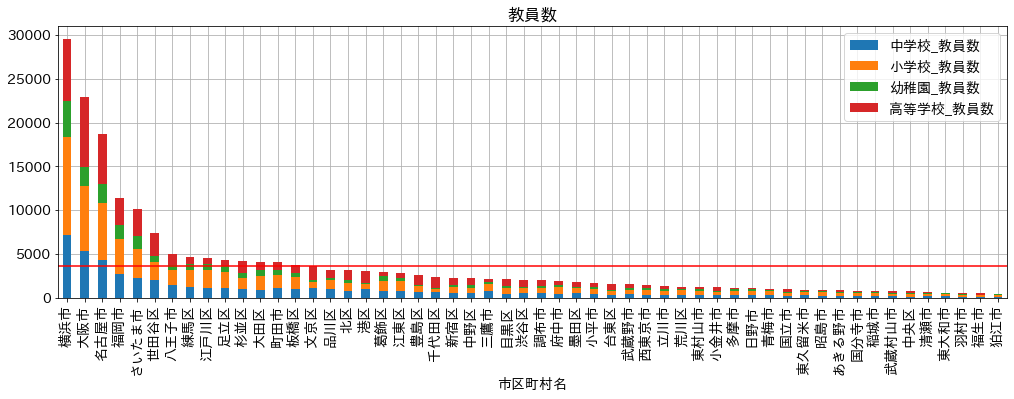

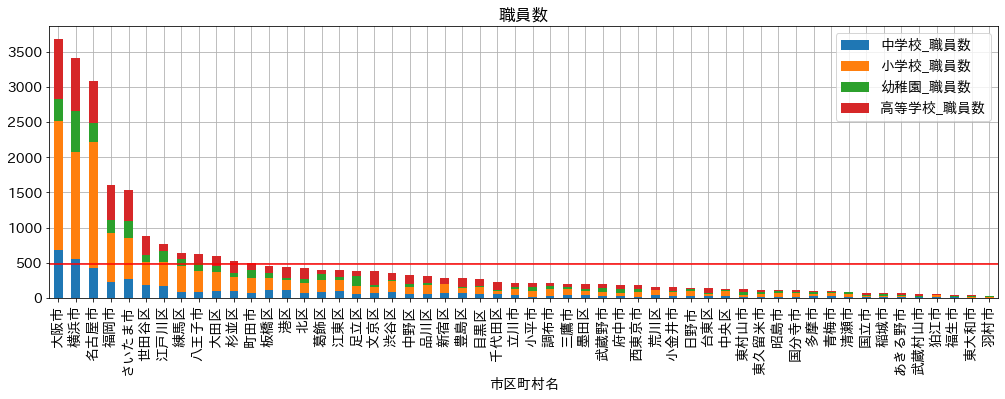

In [24]:
for target in ['学校数', '生徒数', '学級数', '教員数', '職員数']:
    target_cols = [col for col in df_schools_tokyo.columns if col.endswith('_'+target)]
    target_sum = f'{target}_合計'
    df_schools_tokyo[target_sum] = df_schools_tokyo[target_cols].sum(axis=1)

    draw_stacked_bar_graph_by_city(
        df_schools_tokyo.sort_values(target_sum, ascending=False)[['市区町村名'] + target_cols],
        target,
        df_schools_tokyo[target_sum].mean()
    )

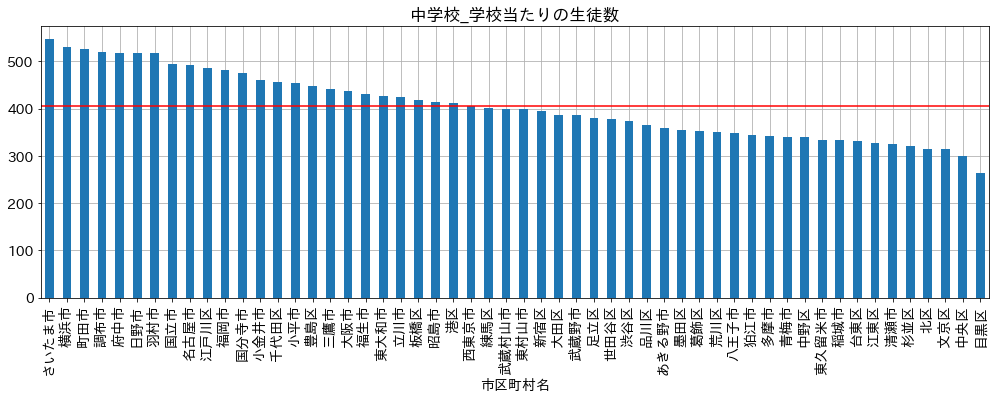

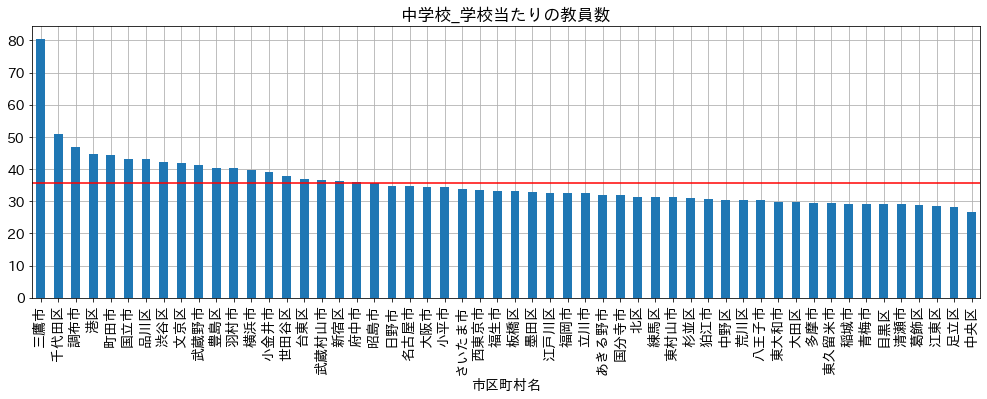

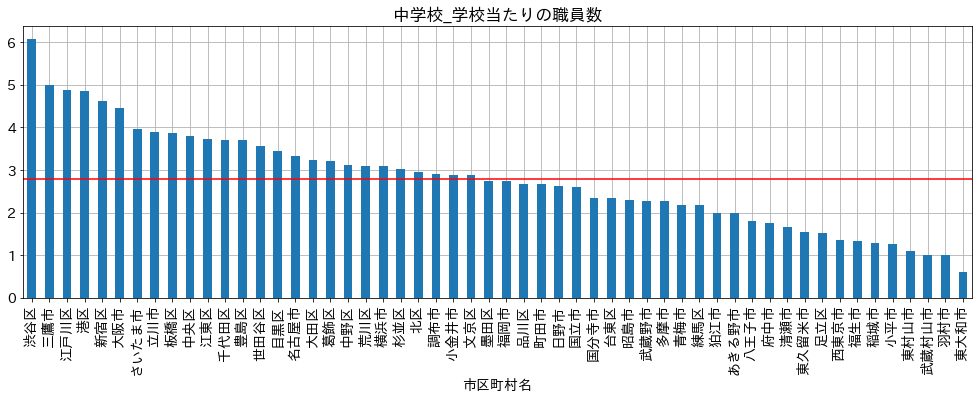

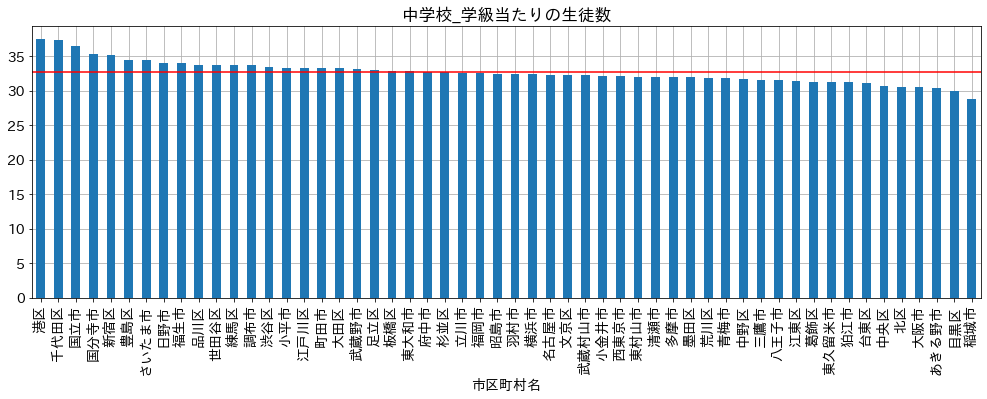

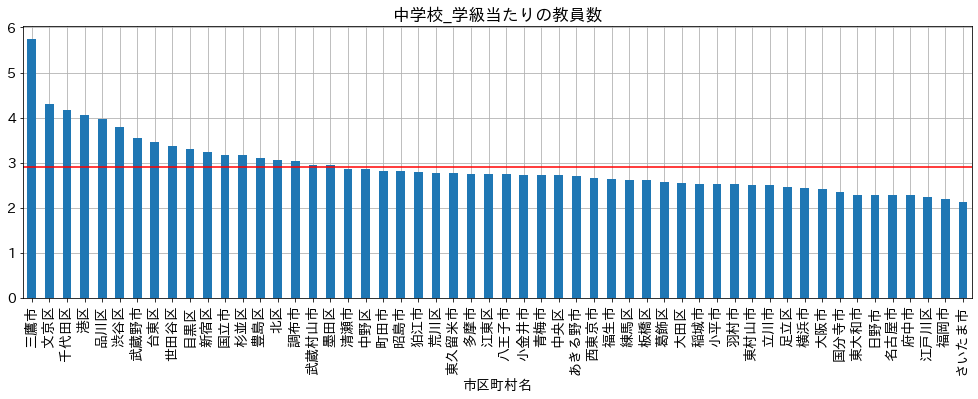

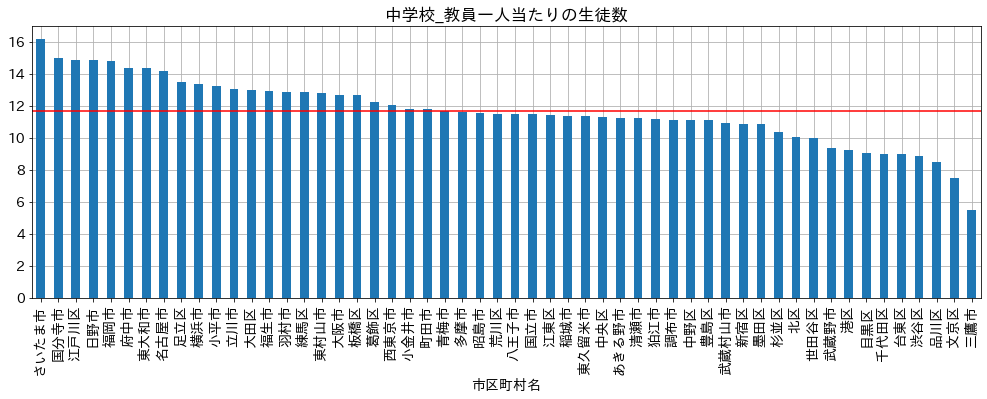

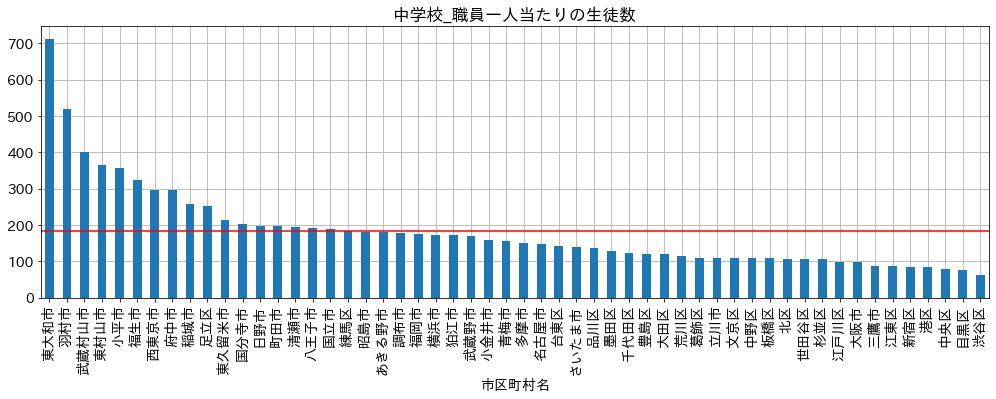

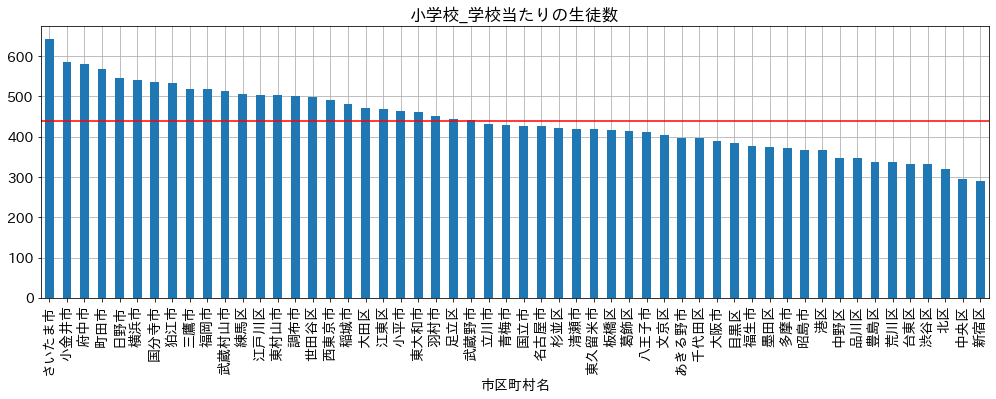

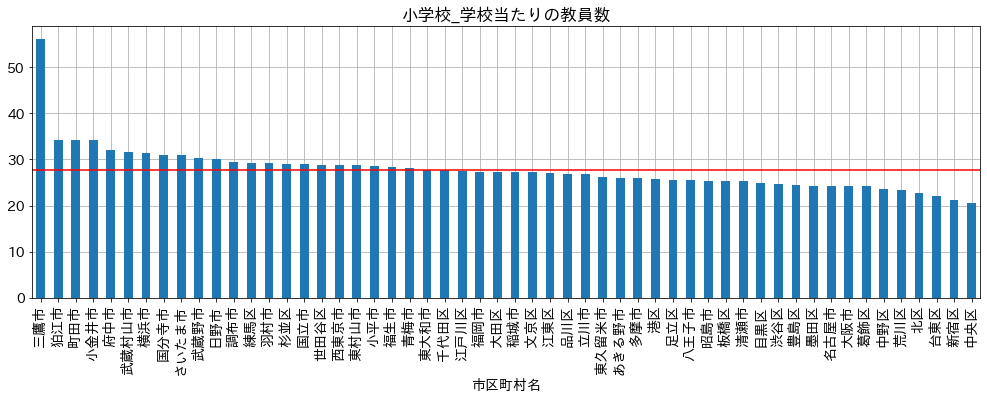

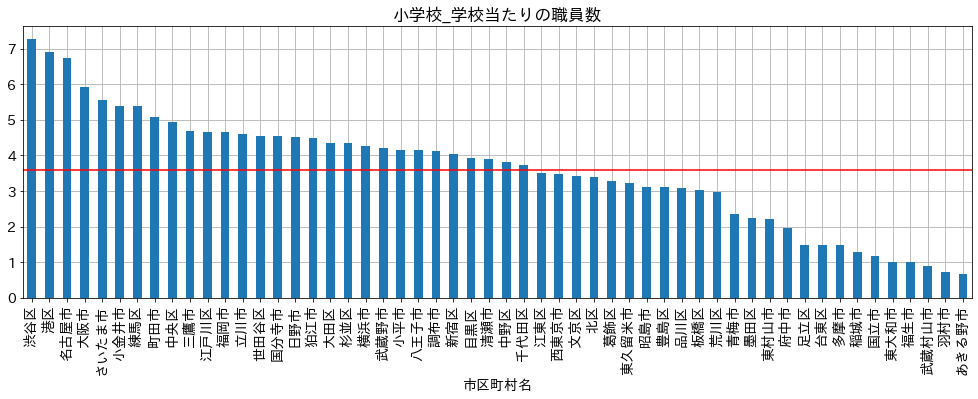

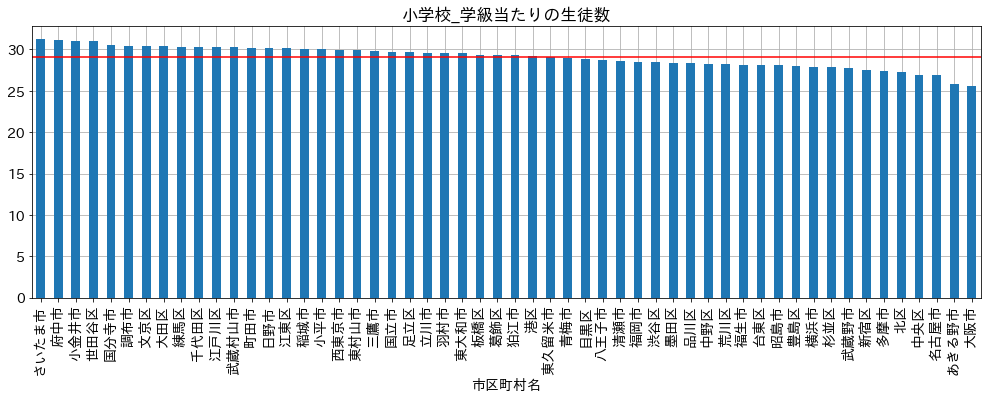

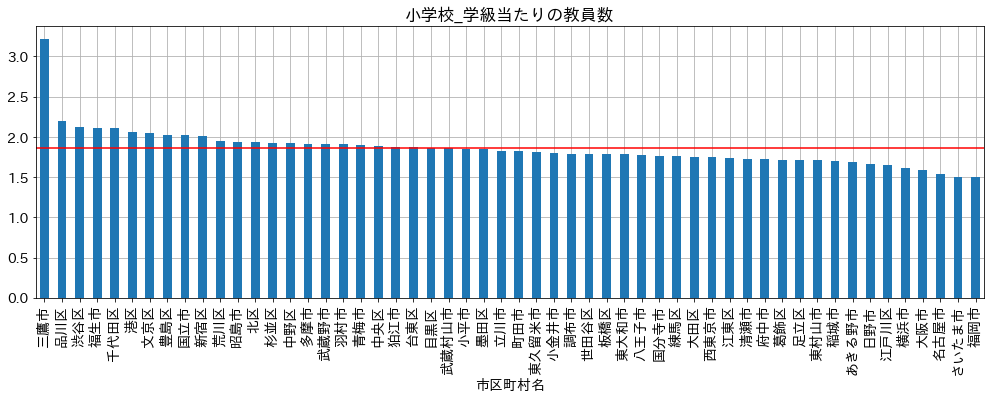

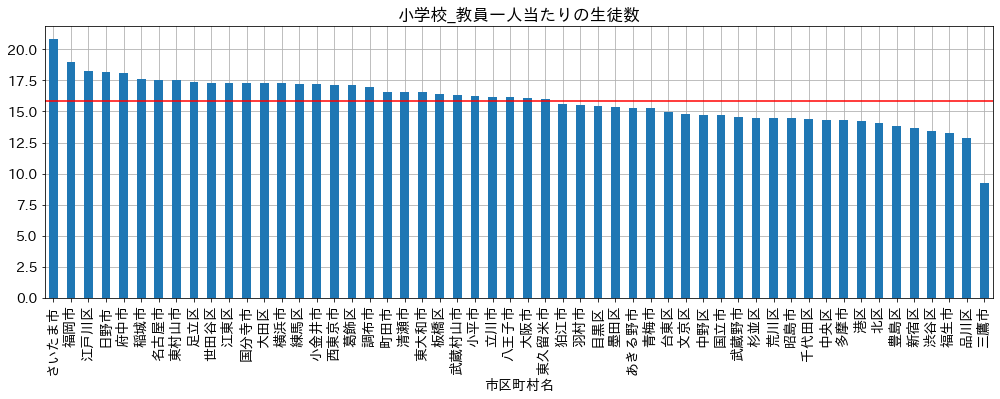

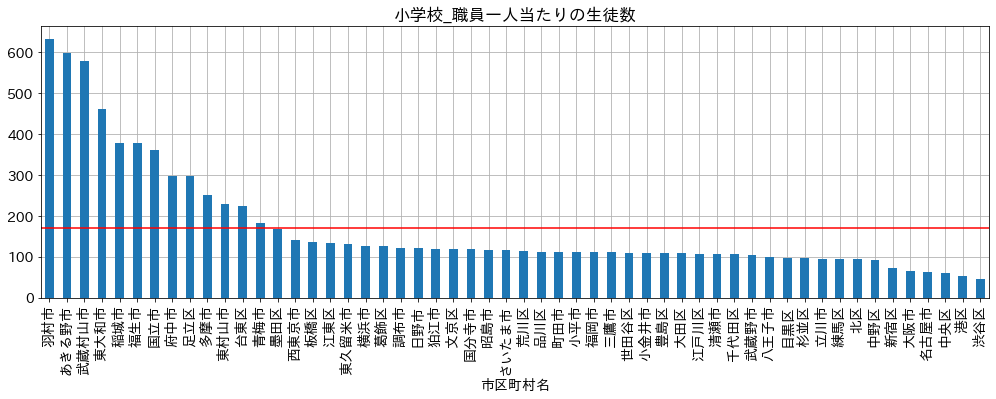

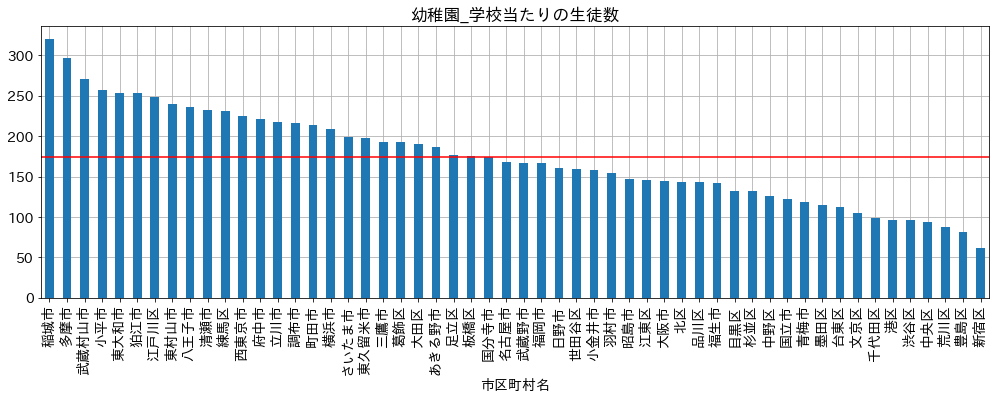

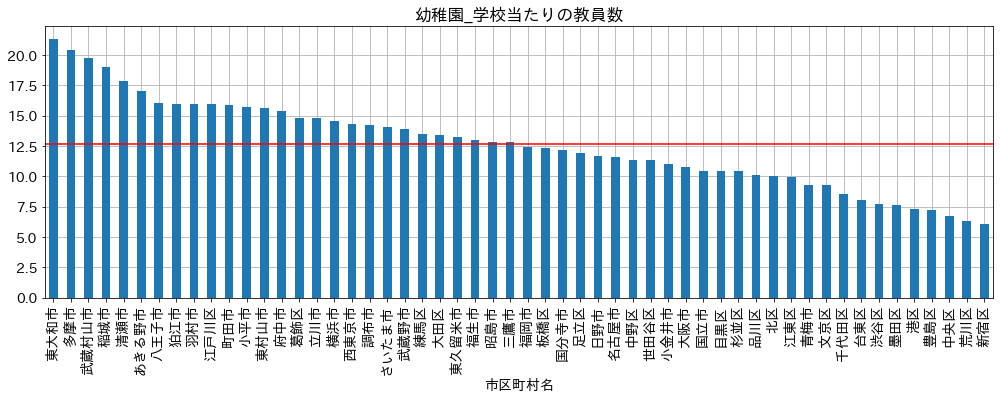

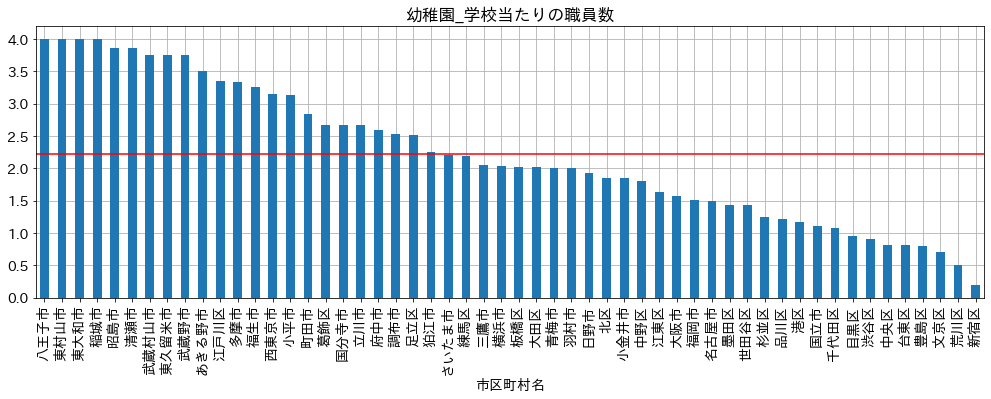

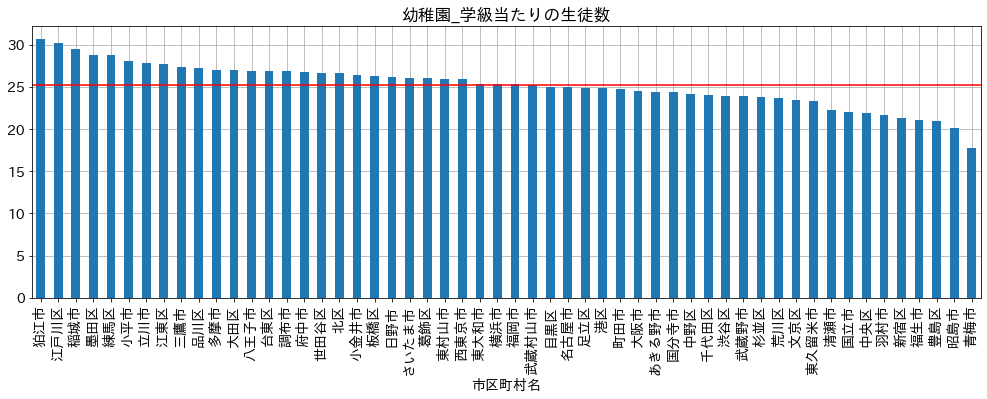

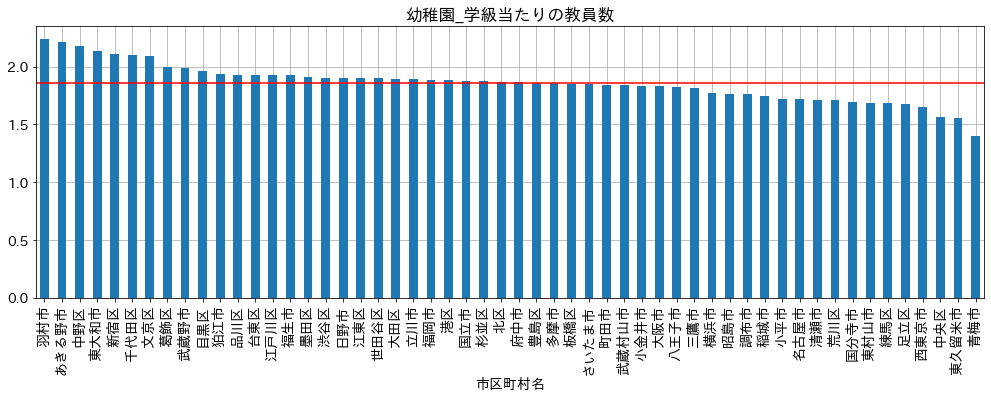

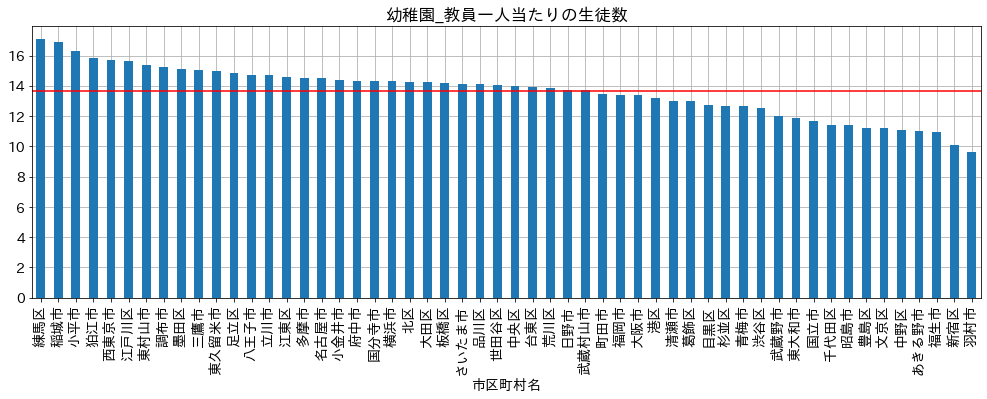

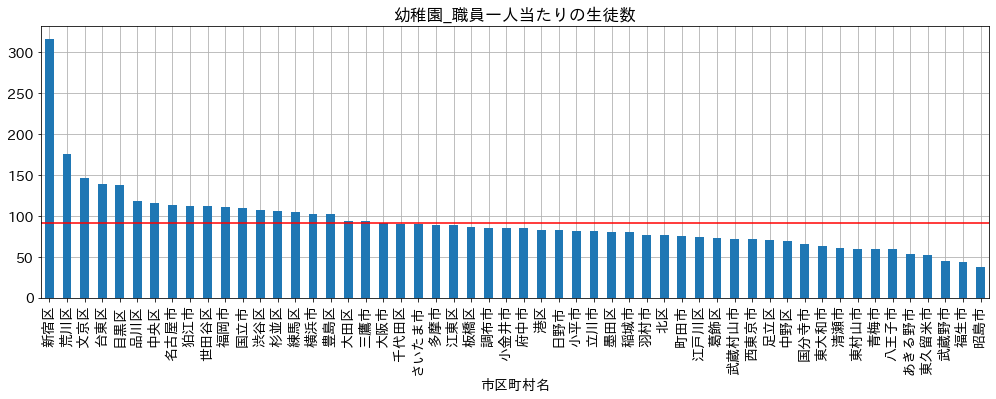

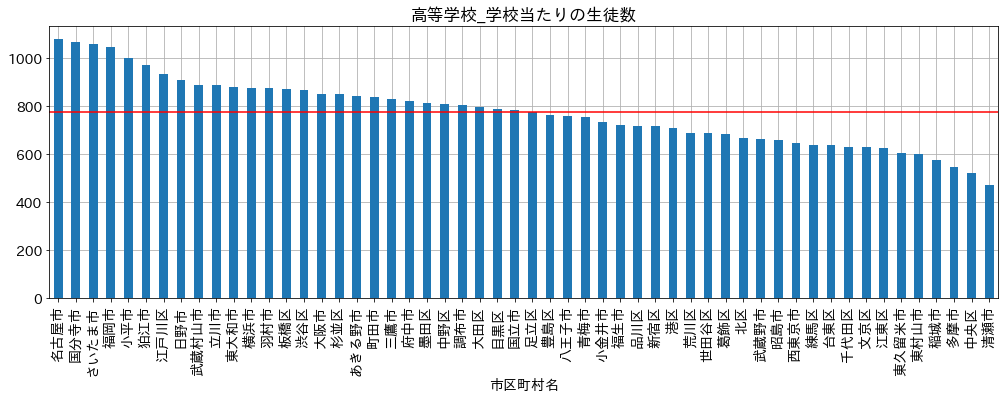

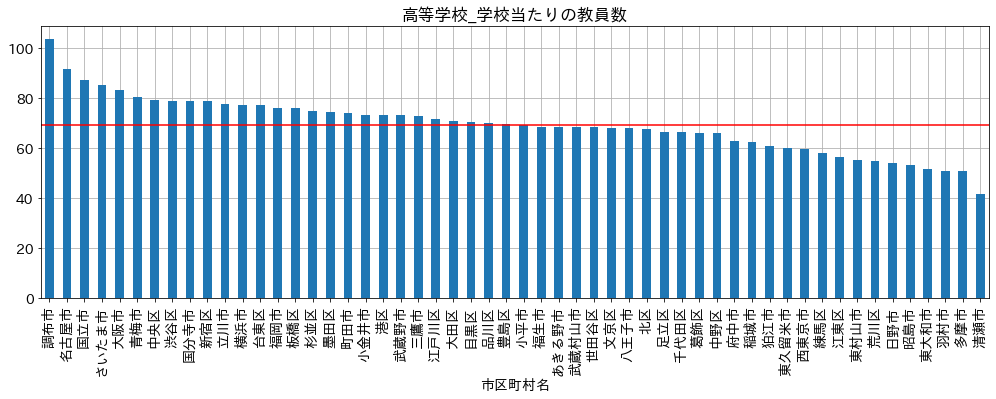

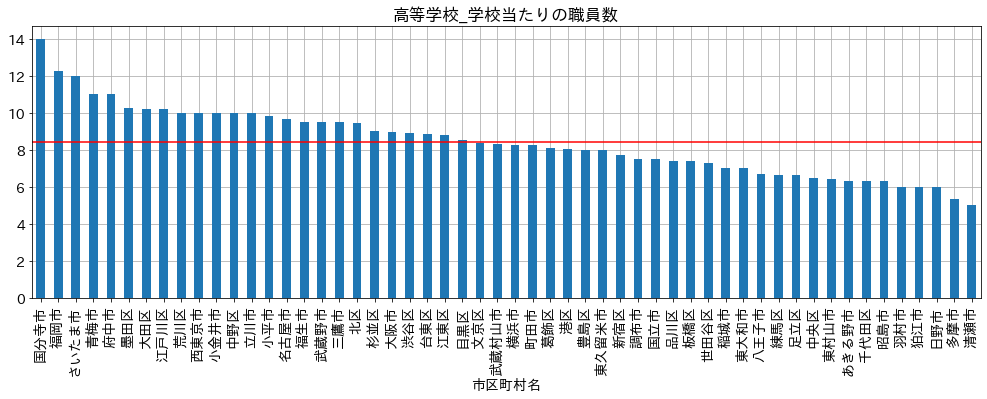

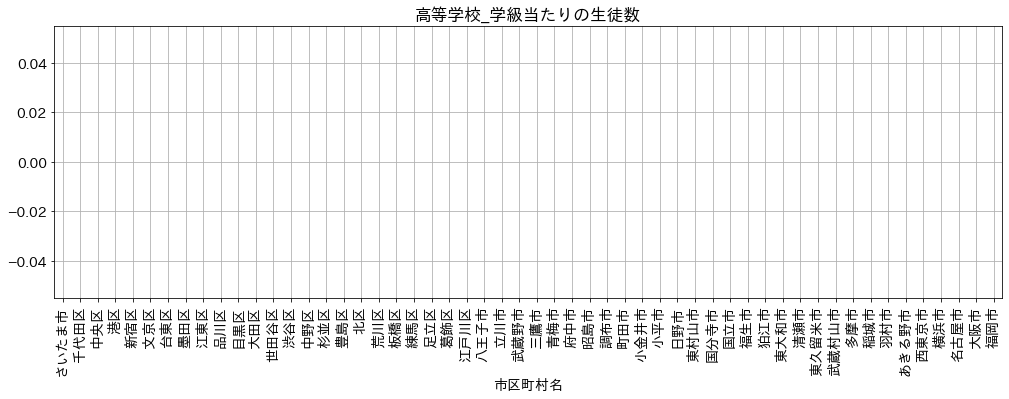

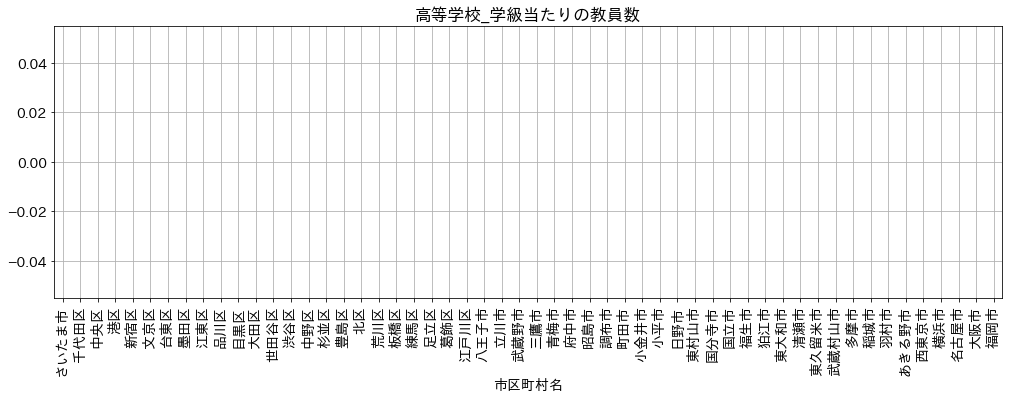

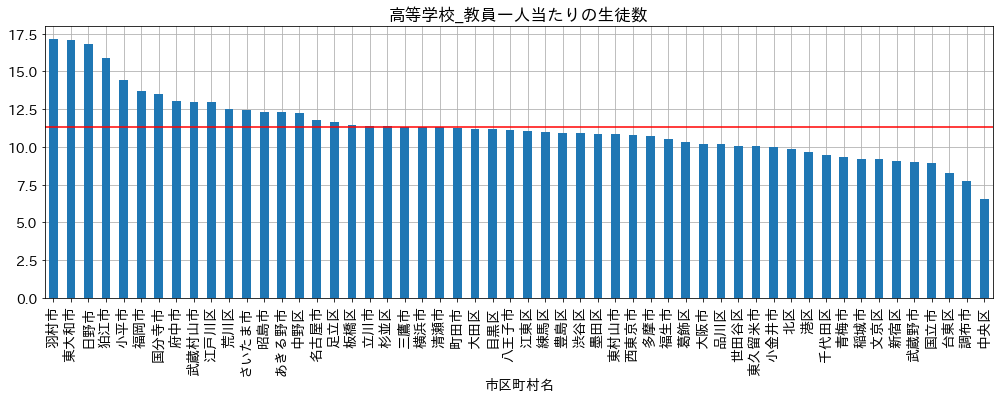

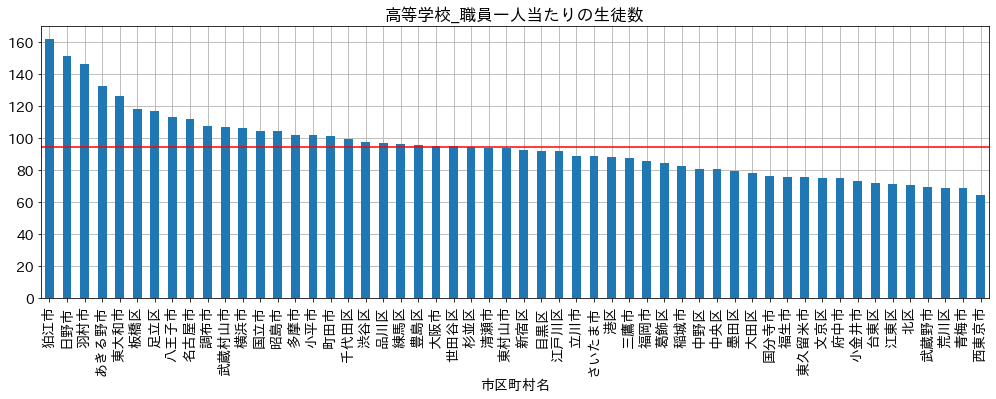

In [25]:
for target_col in [col for col in df_schools_tokyo.columns if '当たりの' in col]:
    draw_bar_graph_by_city(df_schools_tokyo, target_col)